<a href="https://colab.research.google.com/github/solankiharsh/Lending_Club_Insights_and_Modeling/blob/master/Auto_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import random
import networkx as nx
from IPython.display import Image
import matplotlib.pyplot as plt

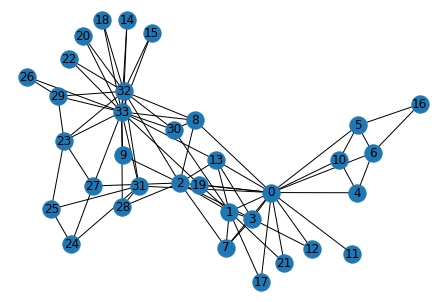

In [ ]:
# Load the graph
G_karate = nx.karate_club_graph()
# Find key-values for the graph
pos = nx.spring_layout(G_karate)
# Plot the graph
nx.draw(G_karate, cmap = plt.get_cmap('rainbow'), with_labels=True, pos=pos)

In [ ]:
n=34
G_karate.degree()

DegreeView({0: 16, 1: 9, 2: 10, 3: 6, 4: 3, 5: 4, 6: 4, 7: 4, 8: 5, 9: 2, 10: 3, 11: 1, 12: 2, 13: 5, 14: 2, 15: 2, 16: 2, 17: 2, 18: 2, 19: 3, 20: 2, 21: 2, 22: 2, 23: 5, 24: 3, 25: 3, 26: 2, 27: 4, 28: 3, 29: 4, 30: 4, 31: 6, 32: 12, 33: 17})

In [ ]:
# Isolate the sequence of degrees
degree_sequence = list(G_karate.degree())

In [ ]:
nb_nodes = n
nb_arr = len(G_karate.edges())
avg_degree = np.mean(np.array(degree_sequence)[:,1])
med_degree = np.median(np.array(degree_sequence)[:,1])
max_degree = max(np.array(degree_sequence)[:,1])
min_degree = np.min(np.array(degree_sequence)[:,1])

A graph is a collection of interconnected nodes. 
- A graph G = (V,E) is made of set of: 
- Nodes (vertices)
- Edges 
- A degree of a node is its number of neighbors

In [ ]:
print("Number of nodes : " + str(nb_nodes))
print("Number of edges : " + str(nb_arr))
print("Maximum degree : " + str(max_degree))
print("Minimum degree : " + str(min_degree))
print("Average degree : " + str(avg_degree))
print("Median degree : " + str(med_degree))

Number of nodes : 34
Number of edges : 78
Maximum degree : 17
Minimum degree : 1
Average degree : 4.588235294117647
Median degree : 3.0


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  This is separate from the ipykernel package so we can avoid doing imports until


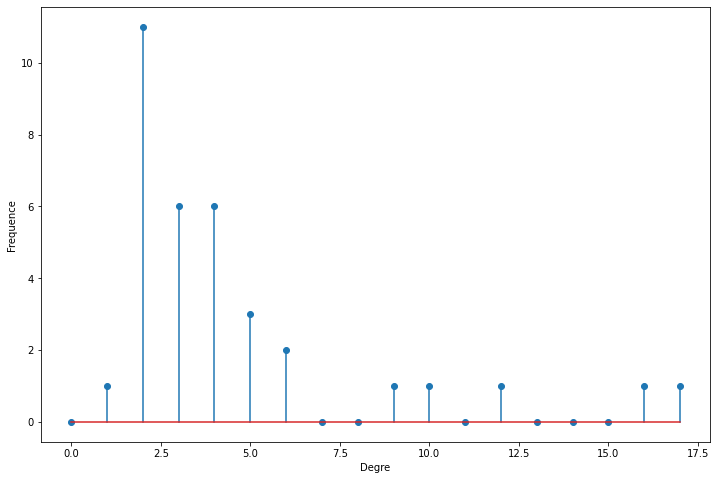

In [ ]:
degree_freq = np.array(nx.degree_histogram(G_karate)).astype('float')
plt.figure(figsize=(12, 8))
plt.stem(degree_freq)
plt.ylabel("Frequence")
plt.xlabel("Degre")
plt.show()

II. How is a graph stored?
- In an edge list : 
- Using the adjacency matrix, usually loaded in memory : For each possible pair in the graph, set it to 1 if the 2 nodes are linked by an edge. A is symmetric if the graph is undirected.

- Using adjacency lists :
- Graphs can usually be stored as .txt files.


In [ ]:
n = G_karate.number_of_nodes()
m = G_karate.number_of_edges()
print("Number of nodes :", str(n))
print("Number of edges :", str(m))
print("Number of connected components :" str(nx.number_connected_components(G_karate)))

SyntaxError: ignored

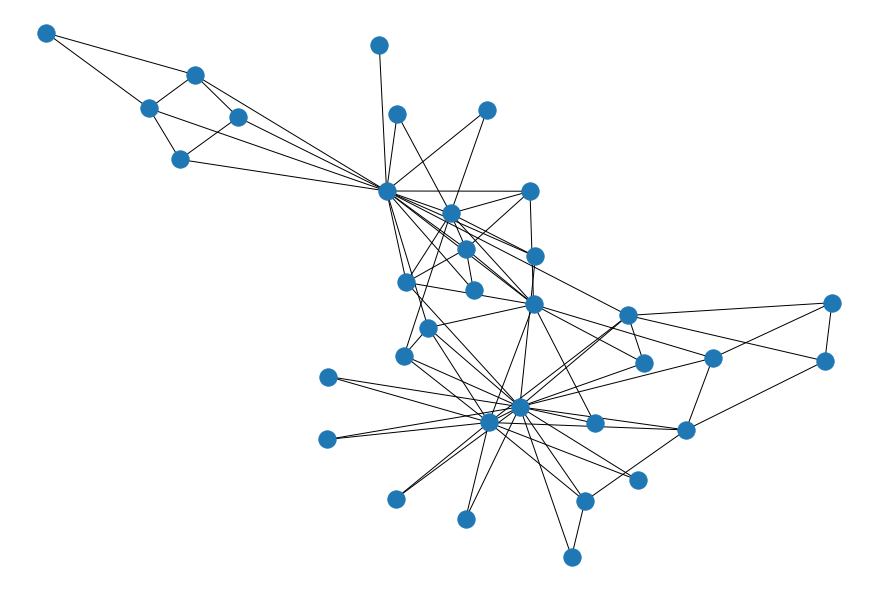

In [ ]:
plt.figure(figsize=(12,8))
nx.draw(G_karate)

In [ ]:
# Take a random sample of edges
edge_subset = random.sample(G_karate.edges(), int(0.25 * G_karate.number_of_edges()))
# Remove some edges
G_karate_train = G_karate.copy()
G_karate_train.remove_edges_from(edge_subset)


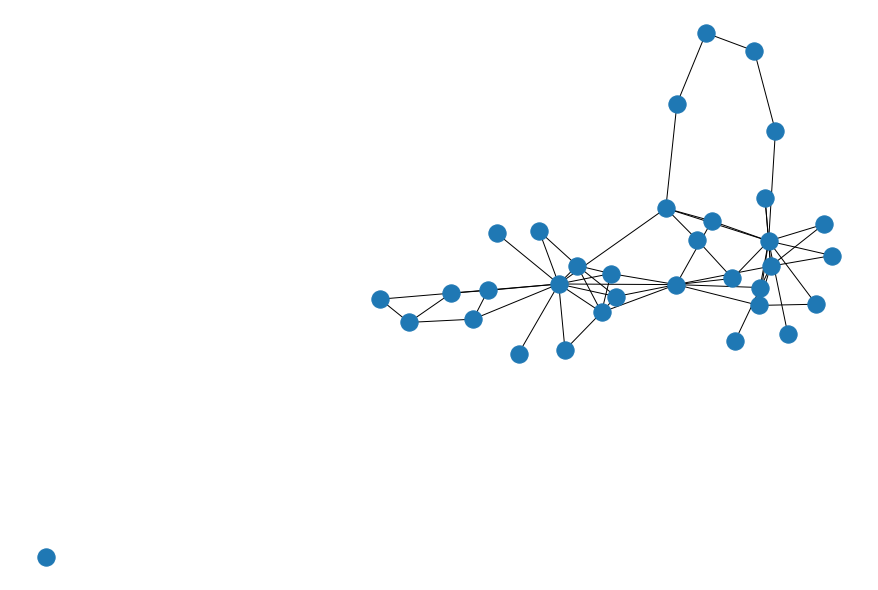

In [ ]:
plt.figure(figsize=(12,8))
nx.draw(G_karate_train)


In [ ]:
edge_subset_size = len(list(edge_subset))
print("Deleted : ", str(edge_subset_size))
print("Remaining : ", str((m - edge_subset_size)))


Deleted :  19


NameError: ignored

In [ ]:
prediction_jaccard = list(nx.jaccard_coefficient(G_karate_train))
score, label = zip(*[(s, (u,v) in edge_subset) for (u,v,s) in prediction_jaccard])


In [ ]:
pip install node2vec


In [ ]:
from node2vec import Node2Vec


In [ ]:
node2vec = Node2Vec(G_karate, dimensions=64, walk_length=30, num_walks=200, workers=4)


Computing transition probabilities: 100%|██████████| 34/34 [00:00<00:00, 1716.80it/s]


In [ ]:
model = node2vec.fit(window=10, min_count=1, batch_words=4)


In [ ]:
model.wv.get_vector(‘2’)


SyntaxError: ignored

In [ ]:
model.wv.most_similar(‘2’)


In [ ]:
from node2vec.edges import HadamardEmbedder
edges_embs = HadamardEmbedder(keyed_vectors=model.wv)


In [ ]:
edges_embs[(‘1’, ‘2’)]


SyntaxError: ignored

In [ ]:
#https://maelfabien.github.io/bigdata/Neo4J_gt/#properties

In [ ]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
%matplotlib inline
import argparse
import logging
import os
from itertools import combinations

In [ ]:
data_dir = '/content/drive/My Drive/ieee-fraud-detection'

In [ ]:
train_identity = pd.read_csv(f'{data_dir}/train_identity.csv')
train_transaction = pd.read_csv(f'{data_dir}/train_transaction.csv')
test_identity = pd.read_csv(f'{data_dir}/test_identity.csv')
test_transaction = pd.read_csv(f'{data_dir}/test_transaction.csv')
sub = pd.read_csv(f'{data_dir}/sample_submission.csv')
# Combining identity and transaction
train = pd.merge(train_transaction, train_identity, on='TransactionID', how='left')
test = pd.merge(test_transaction, test_identity, on='TransactionID', how='left')

In [ ]:
train.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,credit,315.0,87.0,19.0,NaN,NaN,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0,1.0,14.0,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,credit,325.0,87.0,NaN,NaN,gmail.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,debit,330.0,87.0,287.0,NaN,outlook.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,debit,476.0,87.0,NaN,NaN,yahoo.com,NaN,2.0,5.0,0.0,0.0,0.0,4.0,0.0,0.0,1.0,0.0,1.0,0.0,25.0,1.0,112.0,112.0,0.0,94.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,credit,420.0,87.0,NaN,NaN,gmail.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,70787.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0,NotFound,NaN,-480.0,New,NotFound,166.0,NaN,542.0,144.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,Android 7.0,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M


In [ ]:
G = nx.from_pandas_edgelist(df, "isFraud", "TransactionAmt", edge_attr=True, create_using=nx.Graph())


NameError: ignored

Business Motivation:

An auto insurance is a policy purchased by vehicle owners to mitigate costs associated with getting into an auto accident. 

Instead of paying out of pocket for auto accidents, people pay annual premiums to an auto insurance company;the company then pays all or most of the costs associated with an auto accident or other vehicle damage.

Fraud Detection is one the important usecases of Datascience in Insurance Industry.

Here, we will Develop a predictive model that predicts if an auto insurance claim is fraudalent or not.


In [2]:
import pandas as pd

In [3]:
data_dir_new = '/content/drive/My Drive/Sunlife_ml'
train = pd.read_csv(f'{data_dir_new}/insurance_claims.csv')

In [4]:
train.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,25-01-2015,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,21-01-2015,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,22-02-2015,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,10-01-2015,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,?,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,17-02-2015,Vehicle Theft,?,Minor Damage,None,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N


In [5]:
train['fraud_reported'].value_counts()

N    753
Y    247
Name: fraud_reported, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


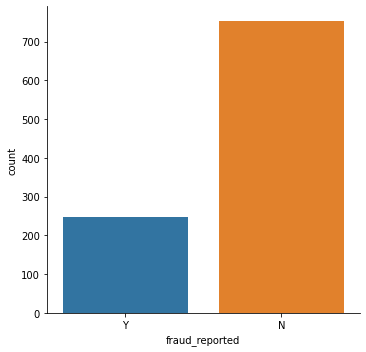

In [7]:
import seaborn as sns
sns.factorplot('fraud_reported',data=train,kind="count")

Obviously, imbalanced dataset as number of reported fraud cases will be lesser in number

In [8]:
train[train=="?"].any()

/usr/local/lib/python3.6/dist-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


months_as_customer             False
age                            False
policy_number                  False
policy_bind_date               False
policy_state                   False
policy_csl                     False
policy_deductable              False
policy_annual_premium          False
umbrella_limit                 False
insured_zip                    False
insured_sex                    False
insured_education_level        False
insured_occupation             False
insured_hobbies                False
insured_relationship           False
capital-gains                  False
capital-loss                   False
incident_date                  False
incident_type                  False
collision_type                  True
incident_severity              False
authorities_contacted          False
incident_state                 False
incident_city                  False
incident_location              False
incident_hour_of_the_day       False
number_of_vehicles_involved    False
p

In [10]:
train['collision_type'].value_counts()

Rear Collision     292
Side Collision     276
Front Collision    254
?                  178
Name: collision_type, dtype: int64

In [11]:
train['property_damage'].value_counts()

?      360
NO     338
YES    302
Name: property_damage, dtype: int64

In [12]:
train['police_report_available'].value_counts()

?      343
NO     343
YES    314
Name: police_report_available, dtype: int64

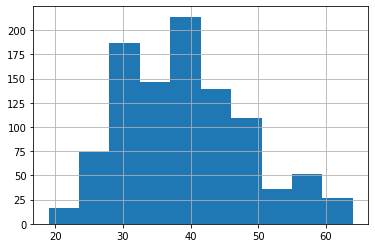

In [13]:
train['age'].hist(bins = 10)

In [14]:
train['age'].mean()

38.948

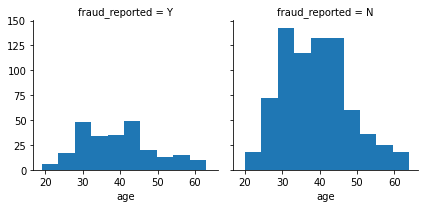

In [16]:
import matplotlib.pyplot as plt
g = sns.FacetGrid(train, col='fraud_reported')
g.map(plt.hist, 'age', bins=10)

In [17]:
train.groupby(['collision_type','fraud_reported']).size()

collision_type   fraud_reported
?                N                 162
                 Y                  16
Front Collision  N                 184
                 Y                  70
Rear Collision   N                 201
                 Y                  91
Side Collision   N                 206
                 Y                  70
dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


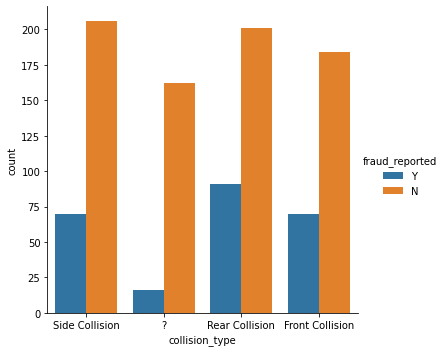

In [18]:
sns.factorplot('collision_type',data=train,kind='count',hue='fraud_reported')

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


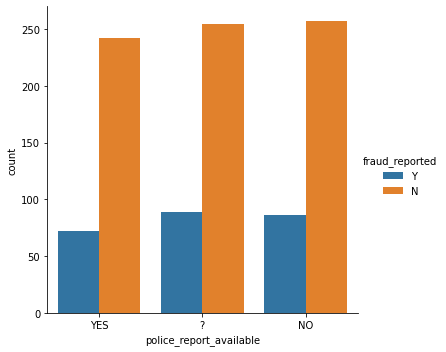

In [19]:
sns.factorplot('police_report_available',data=train,kind='count',hue='fraud_reported')

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


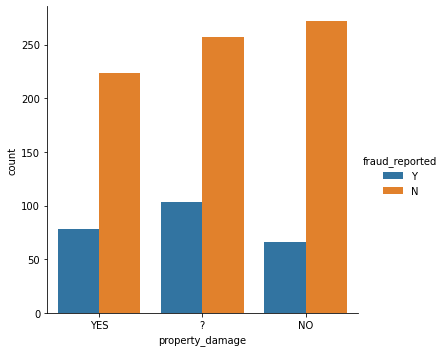

In [20]:
sns.factorplot('property_damage',data=train,kind='count',hue='fraud_reported')

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


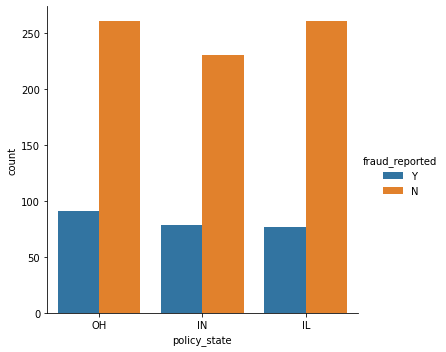

In [21]:
sns.factorplot('policy_state',data=train,kind='count',hue='fraud_reported')

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


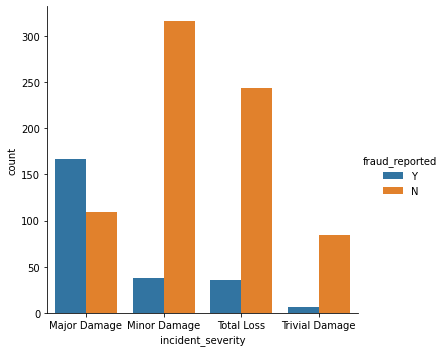

In [22]:
sns.factorplot('incident_severity',data=train,kind='count',hue='fraud_reported')

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


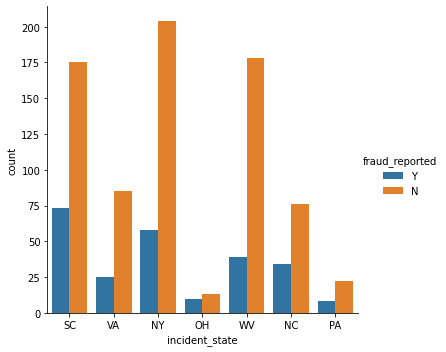

In [23]:
sns.factorplot('incident_state',data=train,kind='count',hue='fraud_reported')

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3672: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


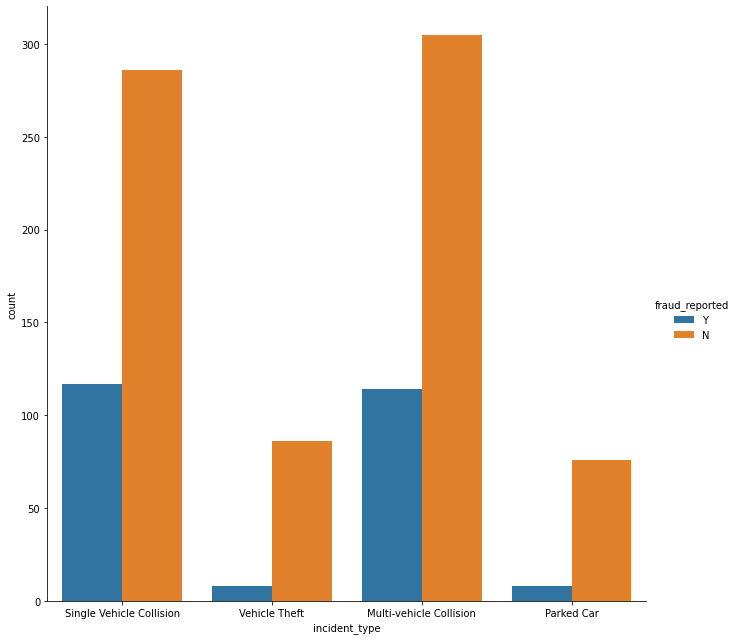

In [24]:
sns.factorplot('incident_type',data=train,kind='count',hue='fraud_reported',size =9)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


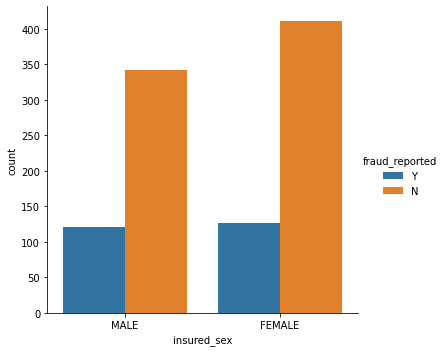

In [25]:
sns.factorplot('insured_sex',data=train,kind='count',hue='fraud_reported')

In [27]:
import numpy as np
train.describe(include=[np.object])

,policy_bind_date,policy_state,policy_csl,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,property_damage,police_report_available,auto_make,auto_model,fraud_reported
count,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000
unique,951,3,3,2,7,14,20,6,60,4,4,4,5,7,7,1000,3,3,14,39,2
top,28-04-1992,OH,250/500,FEMALE,JD,machine-op-inspct,reading,own-child,02-02-2015,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Springfield,7644 Tree Ridge,?,?,Dodge,RAM,N
freq,3,352,351,537,161,93,64,183,28,419,292,354,292,262,157,1,360,343,80,43,753


In [28]:
pd.crosstab(index=[train['incident_date']], columns=[train['fraud_reported']])

fraud_reported,N,Y
incident_date,,
01-01-2015,14,5
01-02-2015,12,6
01-03-2015,8,4
02-01-2015,7,4
02-02-2015,19,9
03-01-2015,14,4
03-02-2015,11,2
04-01-2015,11,1
04-02-2015,16,8


In [29]:
train['incident_date1'] =  pd.to_datetime(train['incident_date'], format='%d-%m-%Y')

In [30]:
import datetime
train['month'] = pd.DatetimeIndex(train['incident_date1']).month

In [31]:
train['month'].value_counts()

1    516
2    472
3     12
Name: month, dtype: int64

In [32]:
train['day'] = pd.DatetimeIndex(train['incident_date']).day

In [33]:
train['day'].value_counts()

1     200
2     199
24     41
17     41
21     38
13     37
14     37
22     34
19     33
28     33
18     33
16     32
20     32
23     32
15     31
25     28
26     28
27     27
30     21
31     20
3      12
29     11
Name: day, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


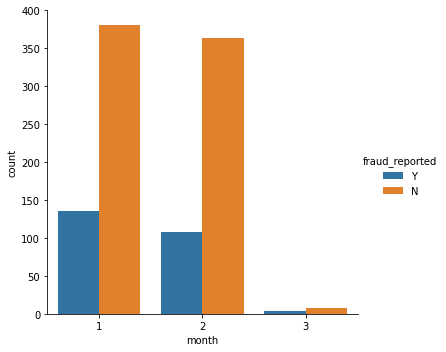

In [34]:
sns.factorplot('month',data=train,kind='count',hue='fraud_reported')

In [35]:
train['policy_bind_date'].value_counts()

28-04-1992    3
05-08-1992    3
01-01-2006    3
05-01-1992    2
25-05-1990    2
             ..
27-01-1991    1
17-02-1995    1
05-07-2000    1
05-01-2012    1
17-12-1995    1
Name: policy_bind_date, Length: 951, dtype: int64

In [36]:
train['policy_bind_date1'] =  pd.to_datetime(train['policy_bind_date'], format='%d-%m-%Y')

train['year'] = pd.DatetimeIndex(train['policy_bind_date1']).year

train['year'].value_counts()

1991    55
2002    50
1992    48
1990    48
1997    44
2014    43
2009    43
1996    43
1994    41
2006    41
2001    41
2007    40
2005    40
1999    40
1995    39
2010    38
2003    37
2004    36
2012    36
2013    35
1993    33
2008    33
2011    32
2000    31
1998    30
2015     3
Name: year, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3672: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


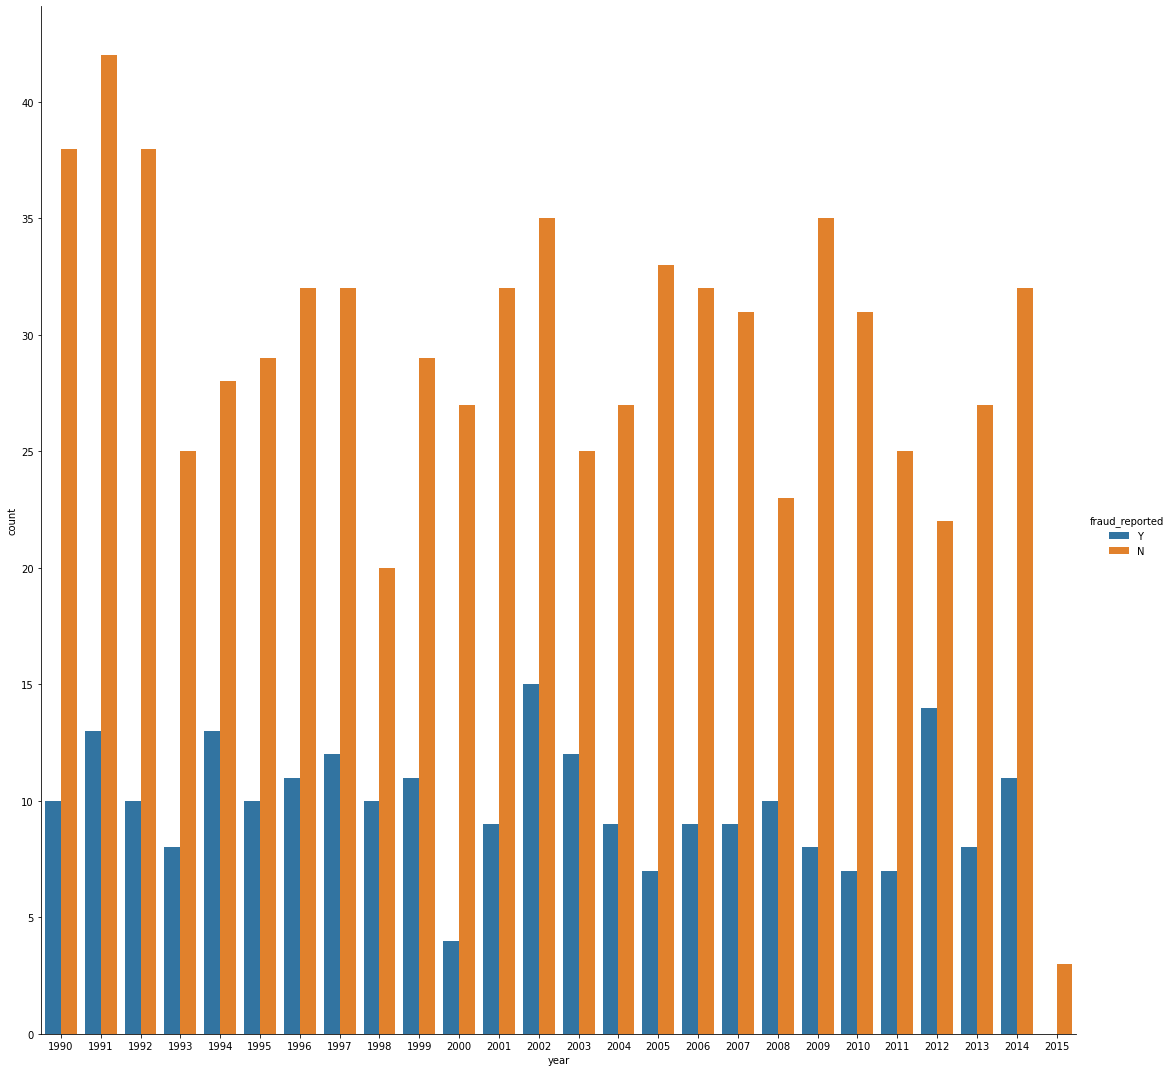

In [37]:
sns.factorplot('year',data=train,kind='count',hue='fraud_reported',size=15)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3672: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


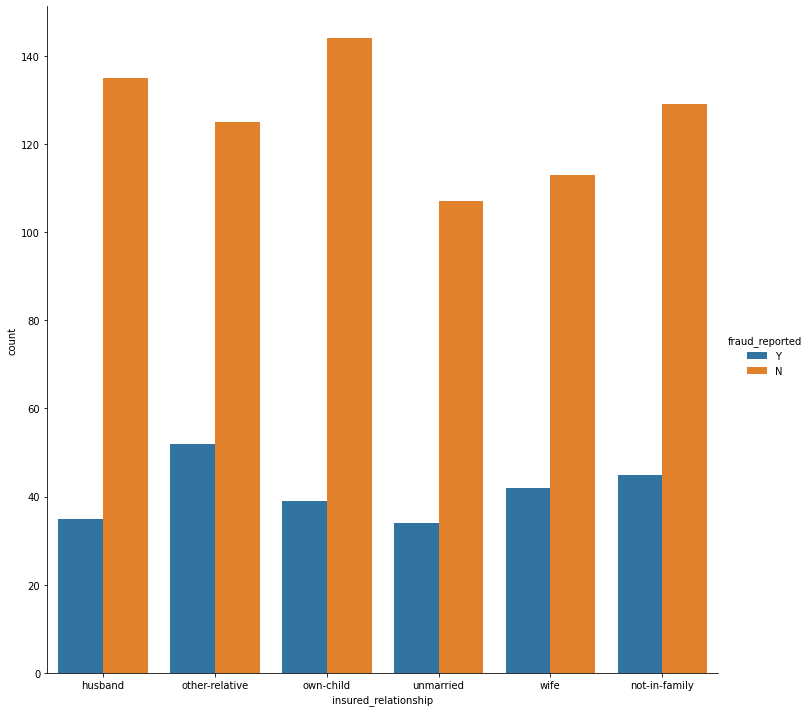

In [38]:
sns.factorplot('insured_relationship',data=train,kind='count',hue='fraud_reported',size=10)

In [40]:
train.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,incident_date1,month,day,policy_bind_date1,year
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,25-01-2015,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y,2015-01-25,1,25,2014-10-17,2014
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,21-01-2015,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,2007,Y,2015-01-21,1,21,2006-06-27,2006
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,22-02-2015,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,2015-02-22,2,22,2000-09-06,2000
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,10-01-2015,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,?,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,2015-01-10,1,1,1990-05-25,1990
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,17-02-2015,Vehicle Theft,?,Minor Damage,None,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N,2015-02-17,2,17,2014-06-06,2014


In [41]:
train['Age'] = train['age'].astype(int)
train.loc[ train['age'] <= 11, 'age'] = 0
train.loc[(train['age'] > 11) & (train['age'] <= 18), 'age'] = 1
train.loc[(train['age'] > 18) & (train['age'] <= 22), 'age'] = 2
train.loc[(train['age'] > 22) & (train['age'] <= 27), 'age'] = 3
train.loc[(train['age'] > 27) & (train['age'] <= 33), 'age'] = 4
train.loc[(train['age'] > 33) & (train['age'] <= 40), 'age'] = 5
train.loc[(train['age'] > 40) & (train['age'] <= 66), 'age'] = 6
train.loc[ train['age'] > 66, 'age'] = 6

In [42]:
train['Age'].value_counts()

43    49
39    48
41    45
34    44
30    42
31    42
38    42
37    41
33    39
32    38
40    38
29    35
46    33
35    32
36    32
42    32
44    32
28    30
45    26
26    26
48    25
47    24
27    24
57    16
25    14
49    14
55    14
50    13
53    13
61    10
24    10
54    10
60     9
51     9
58     8
56     8
23     7
21     6
59     5
62     4
52     4
64     2
63     2
22     1
20     1
19     1
Name: Age, dtype: int64

In [43]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 45 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   months_as_customer           1000 non-null   int64         
 1   age                          1000 non-null   int64         
 2   policy_number                1000 non-null   int64         
 3   policy_bind_date             1000 non-null   object        
 4   policy_state                 1000 non-null   object        
 5   policy_csl                   1000 non-null   object        
 6   policy_deductable            1000 non-null   int64         
 7   policy_annual_premium        1000 non-null   float64       
 8   umbrella_limit               1000 non-null   int64         
 9   insured_zip                  1000 non-null   int64         
 10  insured_sex                  1000 non-null   object        
 11  insured_education_level      1000 non-null  

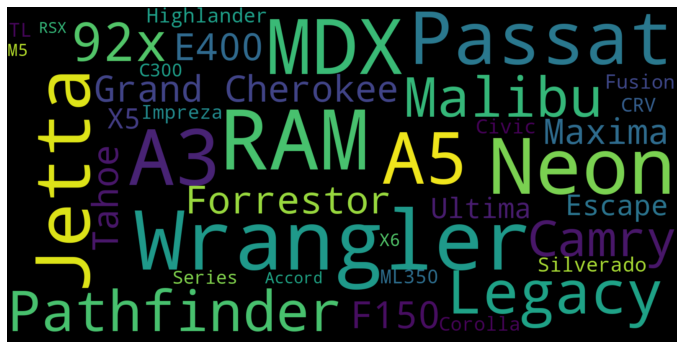

In [44]:
from wordcloud import WordCloud

text = train['auto_model'].to_string()

wordcloud = WordCloud(width=1600, height=800,max_font_size=200).generate(text)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

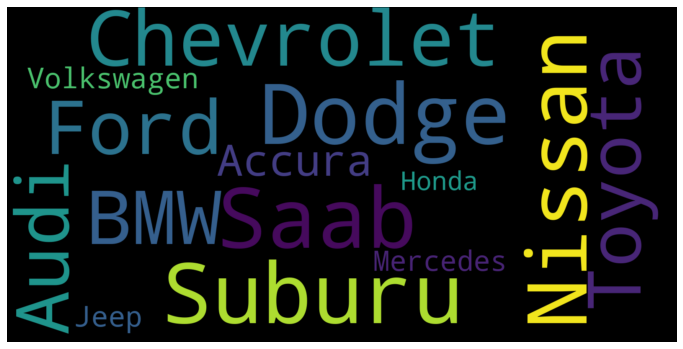

In [45]:
from wordcloud import WordCloud

text = train['auto_make'].to_string()

wordcloud = WordCloud(width=1600, height=800,max_font_size=200).generate(text)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [46]:
train['auto_make'].value_counts()

Dodge         80
Suburu        80
Saab          80
Nissan        78
Chevrolet     76
BMW           72
Ford          72
Toyota        70
Audi          69
Accura        68
Volkswagen    68
Jeep          67
Mercedes      65
Honda         55
Name: auto_make, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3672: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


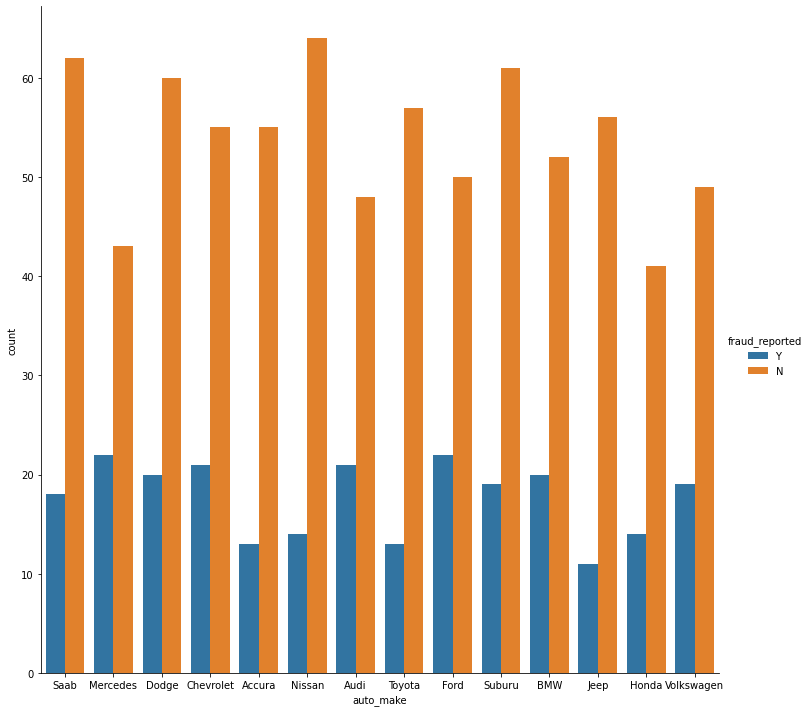

In [47]:
sns.factorplot('auto_make',data=train,kind='count',hue='fraud_reported',size=10)

In [48]:
train['insured_education_level'].value_counts()

JD             161
High School    160
Associate      145
MD             144
Masters        143
PhD            125
College        122
Name: insured_education_level, dtype: int64

In [49]:
train['witnesses'].value_counts()

1    258
2    250
0    249
3    243
Name: witnesses, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


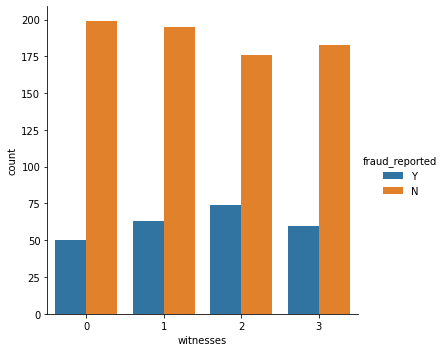

In [50]:
sns.factorplot('witnesses',data=train,kind='count',hue='fraud_reported')

In [51]:
train['auto_year'].value_counts()

1995    56
1999    55
2005    54
2011    53
2006    53
2007    52
2003    51
2010    50
2009    50
2013    49
2002    49
2015    47
1997    46
2012    46
2008    45
2014    44
2001    42
2000    42
1998    40
2004    39
1996    37
Name: auto_year, dtype: int64

In [52]:
train['vehicle_age'] = 2015 - train['auto_year']

In [53]:
train['vehicle_age'].value_counts()

20    56
16    55
10    54
9     53
4     53
8     52
12    51
5     50
6     50
2     49
13    49
0     47
18    46
3     46
7     45
1     44
14    42
15    42
17    40
11    39
19    37
Name: vehicle_age, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3672: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


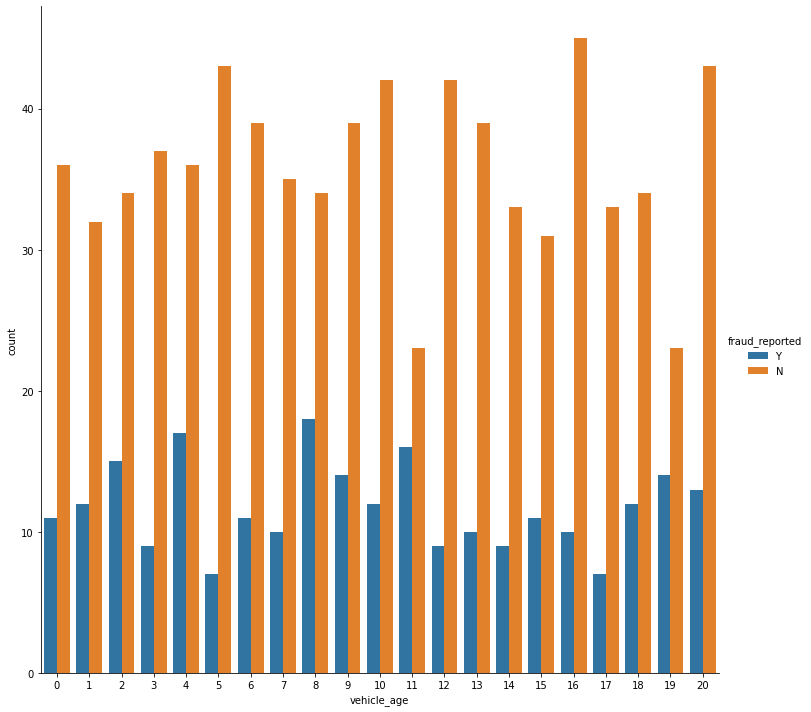

In [54]:
sns.factorplot('vehicle_age',data=train,kind='count',hue='fraud_reported',size=10)

In [55]:
bins = [-1, 3, 6, 9, 12, 17, 20, 24]

names = ["past_midnight", "early_morning", "morning", 'fore-noon', 'afternoon', 'evening', 'night']

train['incident_period_of_day'] = pd.cut(train.incident_hour_of_the_day, bins, labels=names).astype(object)

train[['incident_hour_of_the_day', 'incident_period_of_day']].head(20)

,incident_hour_of_the_day,incident_period_of_day
0,5,early_morning
1,8,morning
2,7,morning
3,5,early_morning
4,20,evening
5,19,evening
6,0,past_midnight
7,23,night
8,21,night
9,14,afternoon


In [57]:
train['incident_period_of_day'].value_counts()

afternoon        231
past_midnight    165
night            131
early_morning    123
morning          119
fore-noon        116
evening          115
Name: incident_period_of_day, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3672: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


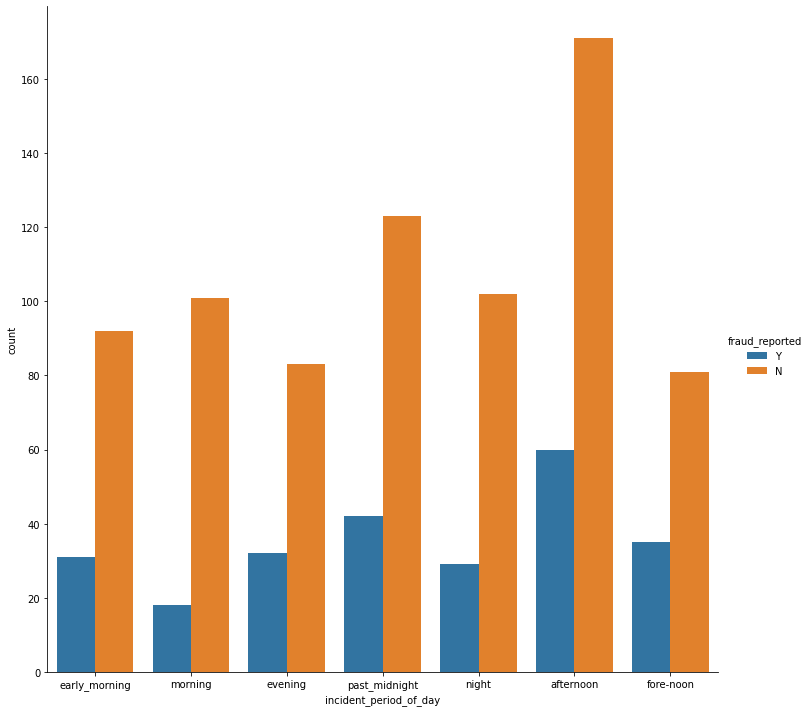

In [58]:
sns.factorplot('incident_period_of_day',data=train,kind='count',hue='fraud_reported',size=10)

In [59]:
train_selected = train.drop(columns = ['policy_number','day','insured_zip', 'policy_bind_date', 'policy_bind_date1','incident_date1','incident_date', 'incident_location', 'auto_year', 'incident_hour_of_the_day'])

In [60]:
train_selected.drop(train_selected[train['collision_type'] == '?'].index, inplace = True)

In [61]:
train_selected.shape

(822, 37)

In [62]:
train_selected['property_damage'].value_counts()

?      297
NO     273
YES    252
Name: property_damage, dtype: int64

In [63]:
x = {'YES': 1, 'NO': 0, '?': 2}

In [64]:
for col in train_selected['property_damage']:
   train_selected['property_damage_new'] = train_selected['property_damage'].map(x)

In [65]:
train_selected['property_damage_new'].value_counts()

2    297
0    273
1    252
Name: property_damage_new, dtype: int64

In [66]:
y = {'YES': 1, 'NO': 0, '?': 2}

In [67]:
for col in train_selected['police_report_available']:
   train_selected['police_report_available_new'] = train_selected['police_report_available'].map(y)

In [68]:
train_selected['police_report_available_new'].value_counts()

2    287
0    271
1    264
Name: police_report_available_new, dtype: int64

In [69]:
X= train_selected.drop('fraud_reported',axis=1)
y = train_selected['fraud_reported']

In [70]:
X.shape


(822, 38)

In [71]:
y.shape


(822,)

In [72]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn import preprocessing
le = preprocessing.LabelEncoder()



x = X.apply(LabelEncoder().fit_transform)

In [73]:
x.drop('police_report_available',axis = 1,inplace= True)
x.drop('property_damage',axis =1,inplace= True)

In [74]:
x.shape

(822, 36)

In [78]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, classification_report
from datetime import *
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn import preprocessing
from sklearn.metrics import classification_report
le = LabelEncoder()
le.fit(y)

y = le.transform(y)

In [79]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=0)

In [80]:
scaler = StandardScaler(copy=True, with_mean=True, with_std=True)

x_train_scaled = scaler.fit_transform(x_train)

x_test_scaled = scaler.transform(x_test)

In [81]:
rfc = RandomForestClassifier(criterion = 'gini', n_estimators=1000, verbose=1, n_jobs = -1, class_weight = 'balanced', max_features = 'auto')

 

rfcg = rfc.fit(x_train_scaled,y_train)

predictions = rfcg.predict(x_test_scaled)

 

print('Baseline: N_features: ', len(list(X.columns)))
print('Baseline: Accuracy: ', round(accuracy_score(y_test, predictions)*100, 2))
print('Baseline: Recall: ', round(recall_score(y_test, predictions)*100, 2))
print('\n Classification Report:\n', classification_report(y_test,predictions))

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:    2.5s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:    0.2s
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed:    0.3s
[Parallel(n_jobs=2)]: Done 1000 out of 1000 | elapsed:    0.4s finished


Baseline: N_features:  38
Baseline: Accuracy:  72.73
Baseline: Recall:  18.75

 Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.95      0.83       117
           1       0.60      0.19      0.29        48

    accuracy                           0.73       165
   macro avg       0.67      0.57      0.56       165
weighted avg       0.70      0.73      0.67       165



In [82]:
def params(yt,yp):
  print('Accuracy:',accuracy_score(yt,yp))
  print('F1score:',f1_score(yt,yp))
  print('Prec:',precision_score(yt,yp))
  print('Recall',recall_score(yt,yp))
  print('ROC:',roc_auc_score(yt,yp))


In [83]:
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score,roc_auc_score


In [84]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(class_weight='balanced',max_depth=4,n_estimators=100)
rfc.fit(x_train,y_train)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=4, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [85]:
y_pred_rf=rfc.predict(x_test)
y_train_pred_rf=rfc.predict(x_train)


In [86]:
print('Test')
params(y_test,y_pred_rf)


Test
Accuracy: 0.7757575757575758
F1score: 0.6336633663366337
Prec: 0.6037735849056604
Recall 0.6666666666666666
ROC: 0.7435897435897435


In [87]:
print('Train')
params(y_train,y_train_pred_rf)

Train
Accuracy: 0.8036529680365296
F1score: 0.6814814814814815
Prec: 0.6216216216216216
Recall 0.7540983606557377
ROC: 0.7884415853911599


In [88]:
from sklearn.metrics import classification_report

In [89]:
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       0.86      0.82      0.84       117
           1       0.60      0.67      0.63        48

    accuracy                           0.78       165
   macro avg       0.73      0.74      0.74       165
weighted avg       0.78      0.78      0.78       165



In [90]:
lr=LogisticRegression(class_weight='balanced')
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
y_train_pred=lr.predict(x_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [91]:
print('Testing params')
params(y_test,y_pred)

Testing params
Accuracy: 0.6909090909090909
F1score: 0.5321100917431192
Prec: 0.47540983606557374
Recall 0.6041666666666666
ROC: 0.6653311965811964


In [92]:
print('Training params')
params(y_train,y_train_pred)

Training params
Accuracy: 0.7016742770167428
F1score: 0.5720524017467249
Prec: 0.4763636363636364
Recall 0.7158469945355191
ROC: 0.7060247630905444


In [97]:
y1 = {'MALE': 1, 'FEMALE': 0}
for col in axa1['insured_sex']:
   train_selected['insured_sex_new'] = train_selected['insured_sex'].map(y1)
train_selected['insured_sex_new'].value_counts()


NameError: ignored

In [94]:
y2 = {'OH': 1, 'IL': 0, 'IN':2}
for col in train_selected['policy_state']:
   train_selected['policy_state_new'] = train_selected['policy_state'].map(y2)
train_selected['policy_state_new'].value_counts()

"y2 = {'OH': 1, 'IL': 0, 'IN':2}\nfor col in axa1['policy_state']:\n   axa1['policy_state_new'] = axa1['policy_state'].map(y2)\naxa1['policy_state_new'].value_counts()"

In [96]:
train_selected['insured_education_level'].value_counts()

JD             132
High School    127
MD             123
Masters        118
Associate      110
PhD            107
College        105
Name: insured_education_level, dtype: int64

In [99]:
y3 = {'JD': 0, 'High School': 1, 'Associate':2,'MD':3,'Masters':4, 'PhD':5, 'College':6}
for col in train_selected['insured_education_level']:
   train_selected['insured_education_level_new'] = train_selected['insured_education_level'].map(y3)
train_selected['insured_education_level_new'].value_counts()

0    132
1    127
3    123
4    118
2    110
5    107
6    105
Name: insured_education_level_new, dtype: int64

In [100]:
train_selected['insured_occupation'].value_counts()

machine-op-inspct    81
prof-specialty       69
exec-managerial      65
transport-moving     63
tech-support         62
craft-repair         62
sales                60
priv-house-serv      56
armed-forces         56
other-service        54
protective-serv      51
handlers-cleaners    50
adm-clerical         48
farming-fishing      45
Name: insured_occupation, dtype: int64

In [102]:
y4 = {'machine-op-inspct': 0, 'prof-specialty': 1, 'tech-support':2,'exec-managerial':3,'sales':4, 'craft-repair':5, 'transport-moving':6,'priv-house-serv':7,'other-service':8,'armed-forces':9,'adm-clerical':10,'protective-serv':11,'handlers-cleaners':12}
for col in train_selected['insured_occupation']:
   train_selected['insured_occupation_new'] = train_selected['insured_occupation'].map(y4)
train_selected['insured_occupation_new'].value_counts()

0.0     81
1.0     69
3.0     65
6.0     63
2.0     62
5.0     62
4.0     60
7.0     56
9.0     56
8.0     54
11.0    51
12.0    50
10.0    48
Name: insured_occupation_new, dtype: int64

In [103]:
train_selected['insured_hobbies'].value_counts()

reading           50
camping           47
exercise          47
bungie-jumping    47
hiking            46
yachting          45
paintball         44
movies            43
kayaking          43
skydiving         43
golf              42
board-games       41
video-games       38
base-jumping      38
chess             38
polo              36
dancing           36
sleeping          36
cross-fit         32
basketball        30
Name: insured_hobbies, dtype: int64